In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'D:/cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [3]:
data.shape

(69301, 13)

In [4]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
data['age']=data['age']/365

In [6]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0
5,995,57.926027,1,164,61.0,100,70,1,1,0,0,1,0
6,996,49.547945,1,162,72.0,100,70,1,1,0,0,1,0
7,997,61.772603,1,161,93.0,140,90,2,1,0,0,1,1
8,999,58.219178,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,61.495890,1,158,65.0,140,90,3,1,0,0,1,1


In [7]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [8]:
data.dtypes

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [9]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
import seaborn as sns
sns.heatmap(data.isnull())

In [11]:
#counting target variables
from collections import Counter
Counter(data['cardio'])

Counter({0: 34679, 1: 34622})

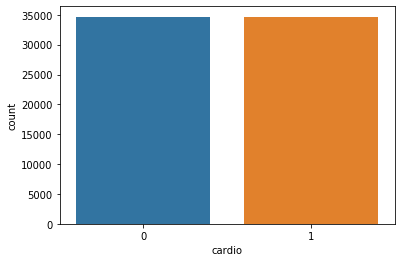

In [12]:
#plotting target variables
sns.countplot(x='cardio',data=data)

In [13]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


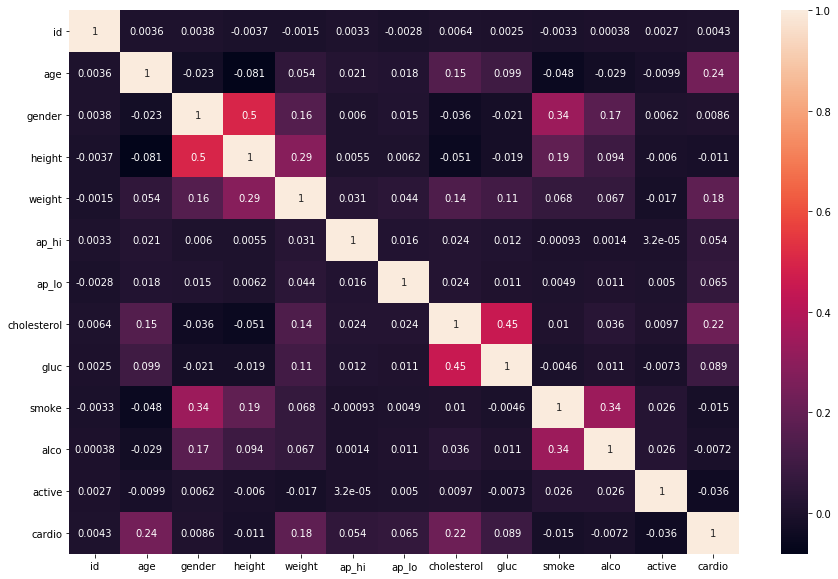

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,)

In [16]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

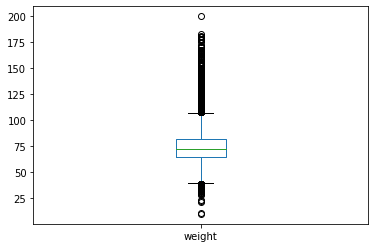

In [17]:
data['weight'].plot.box()

In [18]:
x = np.std(data['weight'])

print(x)

14.38336516450327


In [19]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[1.73243929, 1.21601824, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.73240428, 1.95391548, 0.73302344, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.73236927, 0.98580185, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [1.7338761 , 0.16325352, 1.36421285, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.73394612, 1.20061644, 0.73302344, ..., 0.23864069, 2.02525646,
        1.00082284],
       [1.73398113, 0.43417421, 0.73302344, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [20]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df.shape

(array([    3,     3,    13, ..., 69296, 69297, 69298], dtype=int64), array([ 9, 10,  8, ...,  9,  4, 10], dtype=int64))


(55140, 13)

In [21]:
#splitting the data
x=df.drop('cardio',axis=1)

In [22]:
x.shape

(55140, 12)

In [23]:
y=df['cardio']

In [24]:
y.shape

(55140,)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(44112, 12)
(11028, 12)
(44112,)
(11028,)


In [27]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

71.94414218353282
[[4462 1220]
 [1874 3472]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      5682
           1       0.74      0.65      0.69      5346

    accuracy                           0.72     11028
   macro avg       0.72      0.72      0.72     11028
weighted avg       0.72      0.72      0.72     11028



In [28]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.14276569718231313

In [29]:
ls.coef_

array([ 5.67814279e-08,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  7.88076108e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [30]:
# try to minimize the coeff variance
rs=Ridge()
rs.fit(x_train,y_train)
rs.score(x_train,y_train)

0.21256382973752333

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.8508051317327749

In [33]:
from sklearn.metrics import roc_curve

In [35]:
y_pred_prob=lg.predict_proba(x_test)[:,1]   ## 1 here means positive cancer cases
y_pred_prob

array([0.24796252, 0.40573902, 0.67021044, ..., 0.55582848, 0.49427835,
       0.67054659])

In [36]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [37]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99982401, 0.99982401,
       1.        ])

In [38]:
tpr

array([0.00000000e+00, 1.87055743e-04, 9.35278713e-04, ...,
       9.99812944e-01, 1.00000000e+00, 1.00000000e+00])

In [39]:
thresholds

array([1.99774711, 0.99774711, 0.99352386, ..., 0.00494456, 0.00434134,
       0.00306077])

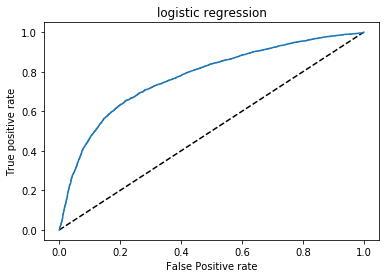

In [40]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive rate")
plt.ylabel("True positive rate")
plt.title("logistic regression")
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
clf =  GridSearchCV(lg,{'C': [1,10,20]},cv=10, return_train_score=False)
clf.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
accuracy=clf.best_score_

In [47]:
accuracy

0.7111534276387378

In [48]:
clf.best_params_

{'C': 1}

In [49]:
lg=LogisticRegression(C=20)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

71.94414218353282
[[4462 1220]
 [1874 3472]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      5682
           1       0.74      0.65      0.69      5346

    accuracy                           0.72     11028
   macro avg       0.72      0.72      0.72     11028
weighted avg       0.72      0.72      0.72     11028

